## INTRODUCTION:
Any Manufacturing Company, a medium-sized manufacturing company specializing in electronic components, is facing challenges in inventory management. These challenges include stockouts, excess inventory, and increased carrying costs. To address these issues, the management team has decided to conduct an inventory analysis. The goal of this analysis is to identify areas for improvement and optimize their inventory management practices. This case study will provide insights and recommendations to enhance the efficiency of Any Manufacturing Company's inventory management processes.

## OBJECTIVES:

The primary objectives of the inventory analysis are as follows

Determine the optimal inventory levels for raw materials, WIP, and finished goods.
Identify opportunities to reduce stockouts and excess inventory.
Analyze inventory turnover and carrying costs to optimize working capital.
Streamline the procurement and production processes to improve efficiency.
Develop a sustainable inventory management strategy for future growth.

In [1]:
# import libraries...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
# Load all dataset....

PurchasePrice = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\2017PurchasePricesDec.csv")  #Purchase price of each product.

BegInv = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\BegInvFINAL12312016.csv")  #Beginning inventory of each product on December 31, 2016.

EndInv = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\EndInvFINAL12312016.csv")  #Ending inventory of each product on December 31, 2016.

Purchases = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\InvoicePurchases12312016.csv")  #Quantity of each product purchased in 2016.

PurchaseFinal = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\PurchasesFINAL12312016.csv")  #Total purchase value of each product in 2016.

SalesFinal = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\SalesFINAL12312016.csv")  #Total sales value of each product in 2016.

### Data Processing and Findings
1. PurchasePrice
2. BegInv
3. EndInv
4. Purchases
5. PurchaseFinal
6. SalesFinal

In [6]:
# Checkingfor PurchasePrice dataset

PurchasePrice.info()
PurchasePrice.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [43]:
# Get the columns in the DataFrame
columns = PurchasePrice.columns

# Print the column names
print(columns)

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')


In [9]:
# Check for missing values
missing_values = PurchasePrice.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


## Observation:
- There are missing value
-  The null values we need to drop them since we dont know they are.

In [12]:
# view the summary statistics of the dataset

PurchasePrice.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [13]:
# Dropping the null values in the PurchasePrice DataFrame

PurchasePrice.dropna(inplace=True)

In [14]:
# Calculate the correlation matrix
correlation_matrix = PurchasePrice.corr()

# Display the correlation matrix
print(correlation_matrix)

                   Brand     Price  Classification  PurchasePrice  \
Brand           1.000000 -0.035824        0.733686      -0.043301   
Price          -0.035824  1.000000       -0.047130       0.997658   
Classification  0.733686 -0.047130        1.000000      -0.056458   
PurchasePrice  -0.043301  0.997658       -0.056458       1.000000   
VendorNumber    0.062648 -0.014470        0.093307      -0.014135   

                VendorNumber  
Brand               0.062648  
Price              -0.014470  
Classification      0.093307  
PurchasePrice      -0.014135  
VendorNumber        1.000000  


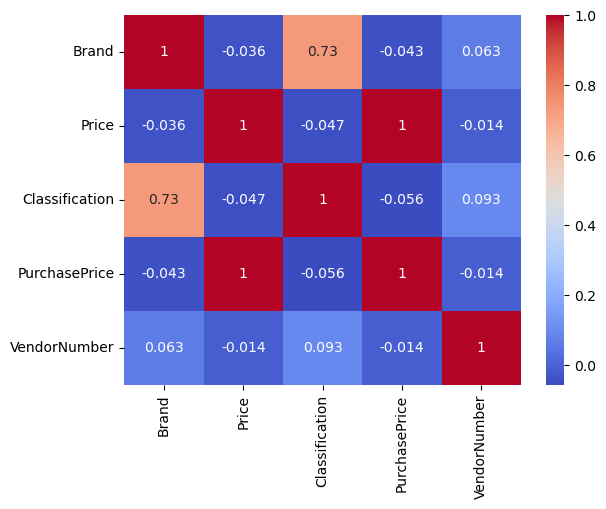

In [20]:
# Calculate the correlation matrix
correlation_matrix = PurchasePrice.corr()

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Observation:

In a correlation matrix, each row and column represents a variable, and the cells in the matrix display the correlation coefficients between pairs of variables.
- where we have  1 means that there is a perfect positive correlation,
- for 0 in the cell means that there is no linear relationship between variables and -1 Negative correlation
- -0. indicates no correlation.

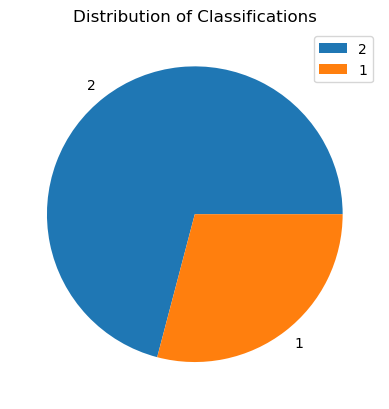

In [47]:
# Create a pie chart for the 'Classification' column

class_counts = PurchasePrice['Classification'].value_counts()
class_counts.plot(kind='pie')
plt.title('Distribution of Classifications')

# Add labels and legend
plt.ylabel('')
plt.legend(labels=class_counts.index, loc='best')

plt.show()

In [49]:
# Count the occurrences of each value in the 'Classification' column
classification_counts = PurchasePrice['Classification'].value_counts()

# Print the counts
print(classification_counts)

2    8693
1    3567
Name: Classification, dtype: int64


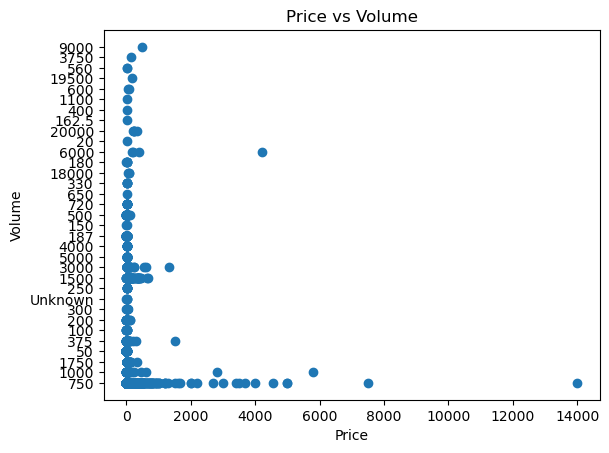

In [52]:
# Create a scatter plot for the 'Price' and 'Volume' columns

plt.scatter(PurchasePrice['Price'], PurchasePrice['Volume'])
plt.title('Price vs Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()

In [21]:
# Checking for BegInv dataset

BegInv.info()
BegInv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [53]:
# Get the columns in the DataFrame
columns = BegInv.columns

# Print the column names
print(columns)

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')


In [22]:
# Check for missing values
missing_values = BegInv.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64


## Observation:
No missing values

In [23]:
# view the summary statistics of the dataset

BegInv.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


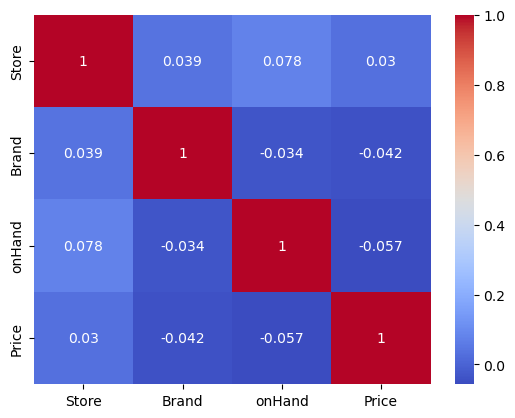

In [24]:
# Calculate the correlation matrix
correlation_matrix = BegInv.corr()

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Observation:

In a correlation matrix, each row and column represents a variable, and the cells in the matrix display the correlation coefficients between pairs of variables.
- where we have  1 means that there is a perfect positive correlation,
- for 0 in the cell means that there is no linear relationship between variables and -1 Negative correlation
- -0. indicates no correlation.

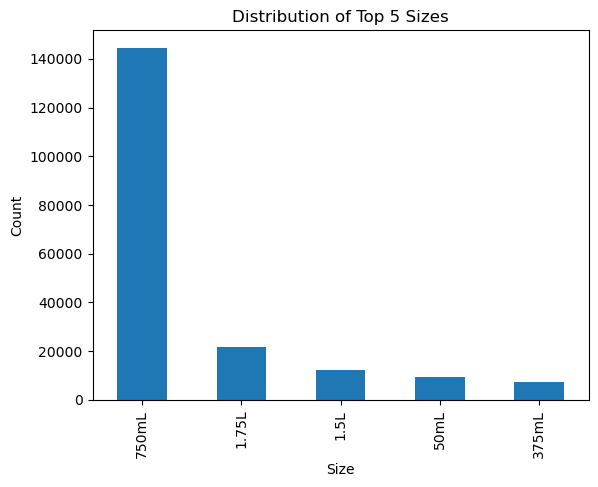

In [55]:
# Get the top 5 sizes by count
top_sizes = BegInv['Size'].value_counts().head(5)

# Create a bar plot for the top 5 sizes
top_sizes.plot(kind='bar')
plt.title('Distribution of Top 5 Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

In [56]:
# Find the city with the highest distribution
city_with_highest_distribution = BegInv['City'].value_counts().idxmax()

# Print the city with the highest distribution
print("City with the highest distribution:", city_with_highest_distribution)

City with the highest distribution: MOUNTMEND


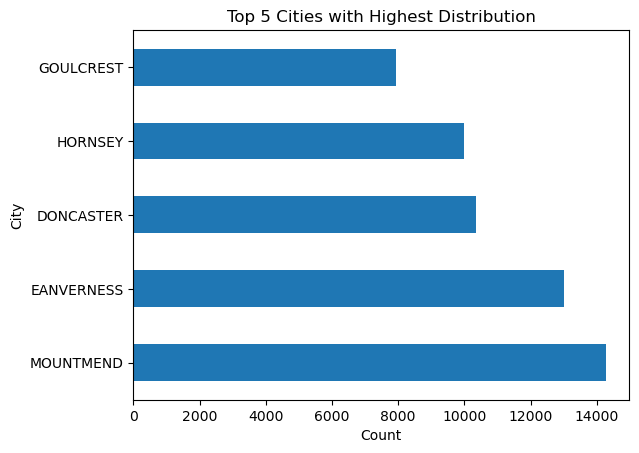

In [57]:
# Get the top 5 cities by count
top_cities = BegInv['City'].value_counts().head(5)

# Create a horizontal bar chart for the top 5 cities
top_cities.plot(kind='barh')
plt.title('Top 5 Cities with Highest Distribution')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

In [25]:
# Checkingfor Purchase dataset

Purchases.info()
Purchases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      5543 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None


In [58]:
# Get the columns in the DataFrame
columns = Purchases.columns

# Print the column names
print(columns)

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')


In [26]:
# Check for missing values
missing_values = Purchases.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64


## Observation:

No missing values

In [29]:
# view the summary statistics of the dataset

Purchases.describe()

,VendorNumber,PONumber,Quantity,Dollars,Freight
count,5543.00000,5543.000000,5543.000000,5.543000e+03,5543.000000
mean,20662.75212,10889.419087,6058.880931,5.807338e+04,295.954301
std,34582.15841,1600.859969,14453.338164,1.402340e+05,713.585093
min,2.00000,8106.000000,1.000000,4.140000e+00,0.020000
25%,3089.00000,9503.500000,83.000000,9.678100e+02,5.020000
50%,7240.00000,10890.000000,423.000000,4.765450e+03,24.730000
75%,10754.00000,12275.500000,5100.500000,4.458718e+04,229.660000
max,201359.00000,13661.000000,141660.000000,1.660436e+06,8468.220000


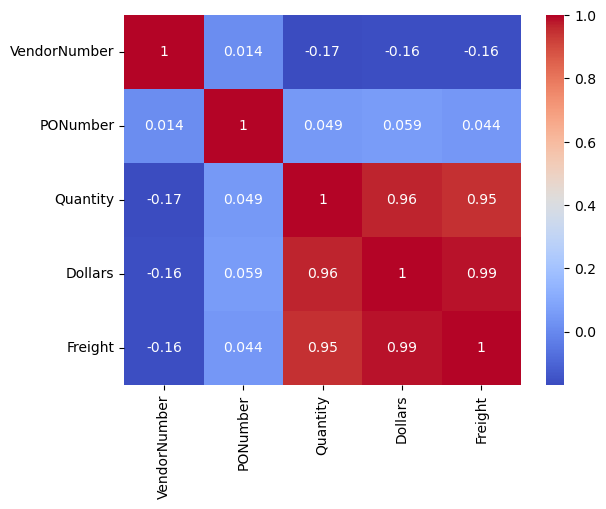

In [30]:
# Calculate the correlation matrix
correlation_matrix = Purchases.corr()

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Observation:

In a correlation matrix, each row and column represents a variable, and the cells in the matrix display the correlation coefficients between pairs of variables.
- where we have  1 means that there is a perfect positive correlation,
- for 0 in the cell means that there is no linear relationship between variables and -1 Negative correlation
- -0. indicates no correlation.

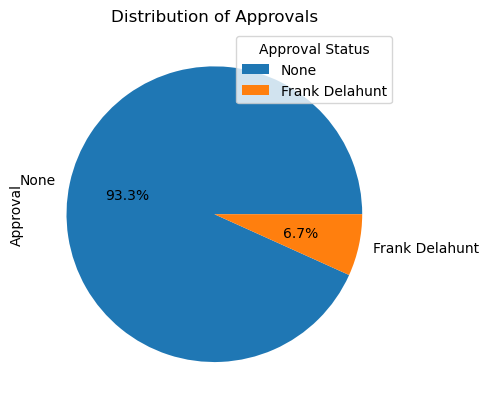

In [67]:
# Create a pie chart for the 'Approval' column

approvals = Purchases['Approval'].value_counts()
approvals.plot(kind='pie', labels=approvals.index, autopct='%1.1f%%')
plt.title('Distribution of Approvals')
plt.legend(title='Approval Status', loc='upper right')
plt.show()

In [69]:
# Get the count of each unique approval value
approval_count = Purchases['Approval'].value_counts()

# Print the approval count
print(approval_count)

None              5169
Frank Delahunt     374
Name: Approval, dtype: int64


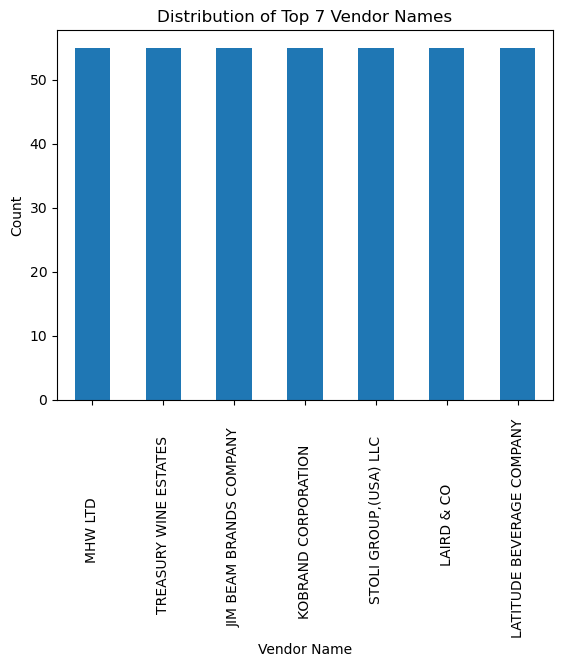

In [62]:
# Create a bar plot for the 'VendorName' column

# Get the top 7 vendor names by count
top_vendor_names = Purchases['VendorName'].value_counts().head(7)

# Create a bar plot for the top 7 vendor names
top_vendor_names.plot(kind='bar')
plt.title('Distribution of Top 7 Vendor Names')
plt.xlabel('Vendor Name')
plt.ylabel('Count')
plt.show()


In [32]:
# Checkingfor PurchaseFinal dataset

PurchaseFinal.info()
PurchaseFinal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [59]:
# Get the columns in the DataFrame
columns = PurchaseFinal.columns

# Print the column names
print(columns)

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')


In [33]:
# Check for missing values
missing_values = PurchaseFinal.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


## Observation:
- There are missing value
-  The null values we need to drop them since we dont know they are.

In [34]:
# Dropping the null values in the PurchasePrice DataFrame

PurchaseFinal.dropna(inplace=True)

In [35]:
# Check for missing values
missing_values = PurchaseFinal.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


## Observation:
- There are missing value
-  The null values we need to drop them since we dont know they are.

In [37]:
# view the summary statistics of the dataset

PurchaseFinal.describe()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
count,2.372471e+06,2.372471e+06,2.372471e+06,2.372471e+06,2.372471e+06,2.372471e+06,2.372471e+06,2.372471e+06
mean,4.465134e+01,1.241865e+04,6.886430e+03,1.104094e+04,1.205002e+01,1.415586e+01,1.356816e+02,1.443520e+00
std,2.351246e+01,1.255728e+04,8.066697e+03,1.565341e+03,1.794504e+01,2.344617e+01,2.816651e+02,4.967999e-01
min,1.000000e+00,5.800000e+01,2.000000e+00,8.106000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.500000e+01,3.639000e+03,3.252000e+03,9.761000e+03,6.120000e+00,6.000000e+00,4.926000e+01,1.000000e+00
50%,4.800000e+01,6.523000e+03,4.425000e+03,1.110300e+04,9.220000e+00,1.000000e+01,8.393000e+01,1.000000e+00
75%,6.700000e+01,1.887700e+04,9.552000e+03,1.239700e+04,1.449000e+01,1.200000e+01,1.405200e+02,2.000000e+00
max,8.100000e+01,9.063100e+04,2.013590e+05,1.366100e+04,5.681810e+03,3.816000e+03,5.017570e+04,2.000000e+00


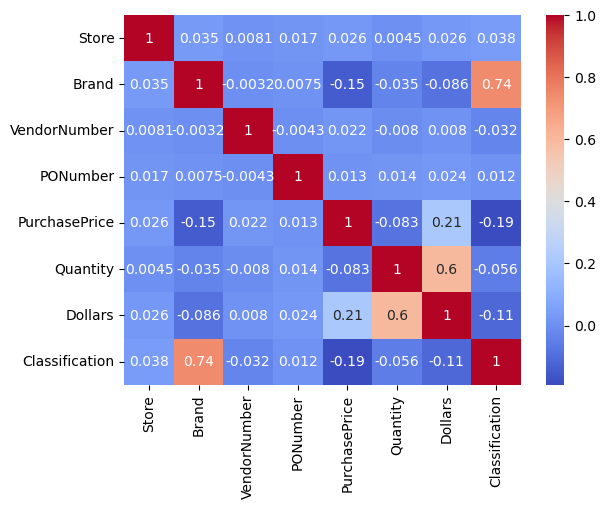

In [38]:
# Calculate the correlation matrix

correlation_matrix = PurchaseFinal.corr()

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

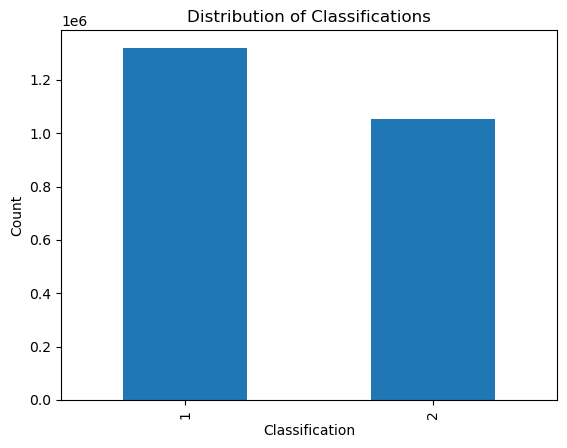

In [71]:
# Create a bar plot for the 'Classification' column
PurchaseFinal['Classification'].value_counts().plot(kind='bar')
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

## Observation:

In a correlation matrix, each row and column represents a variable, and the cells in the matrix display the correlation coefficients between pairs of variables.
- where we have  1 means that there is a perfect positive correlation,
- for 0 in the cell means that there is no linear relationship between variables and -1 Negative correlation
- -0. indicates no correlation.

In [39]:
# Checking for SalesFinal dataset

SalesFinal.info()
SalesFinal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [60]:
# Get the columns in the DataFrame
columns = SalesFinal.columns

# Print the column names
print(columns)

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')


In [40]:
# Check for missing values
missing_values = SalesFinal.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64


## Observation:
- There are missing value
-  The null values we need to drop them since we dont know they are.

In [41]:
# view the summary statistics of the dataset

SalesFinal.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


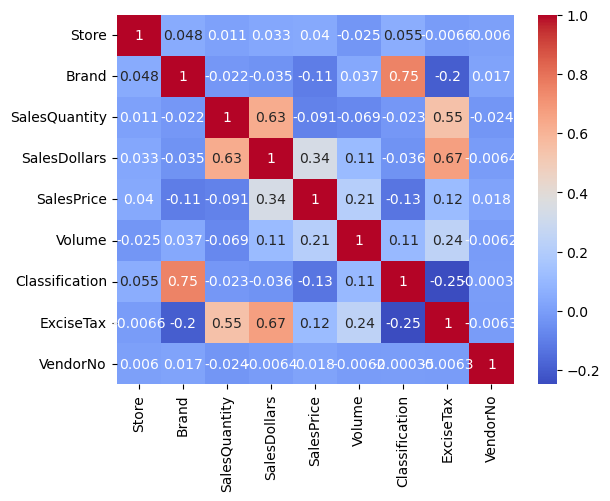

In [42]:
# Calculate the correlation matrix

correlation_matrix = SalesFinal.corr()

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Observation:

In a correlation matrix, each row and column represents a variable, and the cells in the matrix display the correlation coefficients between pairs of variables.
- where we have  1 means that there is a perfect positive correlation,
- for 0 in the cell means that there is no linear relationship between variables and -1 Negative correlation
- -0. indicates no correlation.

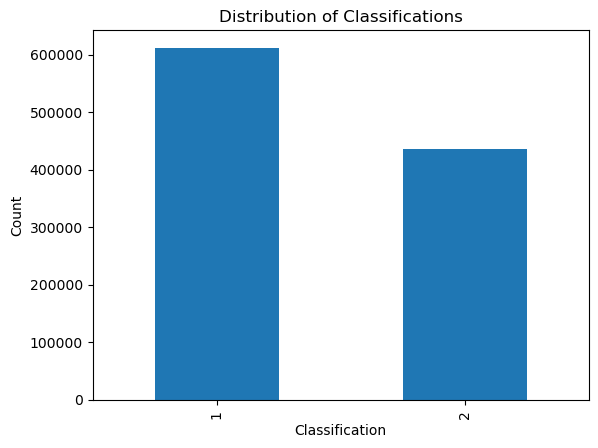

In [72]:
# Create a bar plot for the 'Classification' column
SalesFinal['Classification'].value_counts().plot(kind='bar')
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

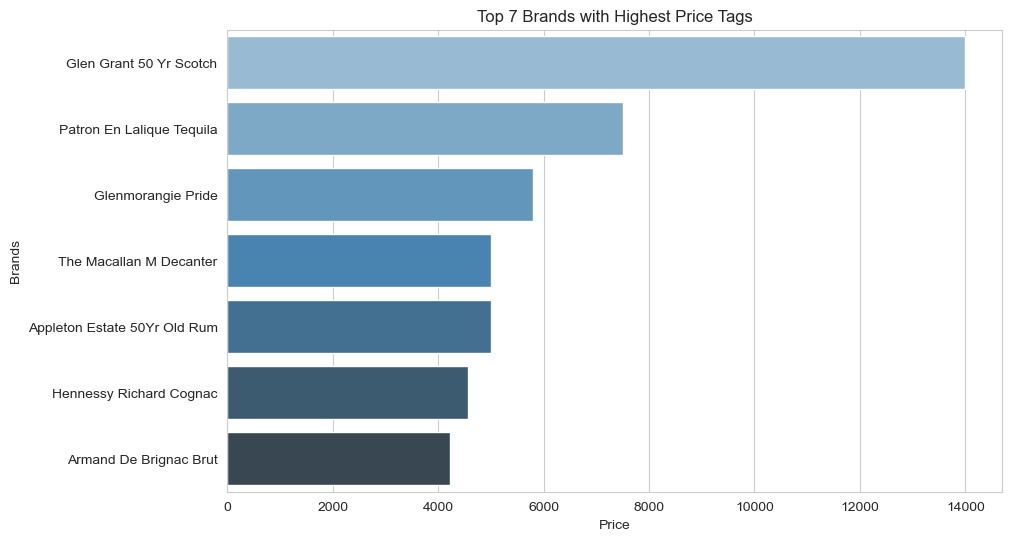

In [74]:
# Get the top 10 brands with the highest price tags
vc = PurchasePrice.groupby(['Description'])['Price'].max().sort_values(ascending=False)[:7]

# Create a horizontal bar plot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=vc.values, y=vc.index, palette='Blues_d')

# Set the title and axis labels
plt.title('Top 7 Brands with Highest Price Tags')
plt.xlabel('Price')
plt.ylabel('Brands')

# Show the plot
plt.show()

In [77]:
# Convert 'SalesDate' to datetime object
SalesFinal['SalesDate'] = pd.to_datetime(SalesFinal['SalesDate'])

# Group by 'SalesDate' and sum 'SalesQuantity'
sales_by_date = SalesFinal.groupby('SalesDate')['SalesQuantity'].sum().reset_index()

# Display the first few rows of the aggregated dataframe
sales_by_date.head()

,SalesDate,SalesQuantity
0,2016-01-01,49911
1,2016-01-02,93114
2,2016-01-03,53037
3,2016-01-04,41341
4,2016-01-05,40831


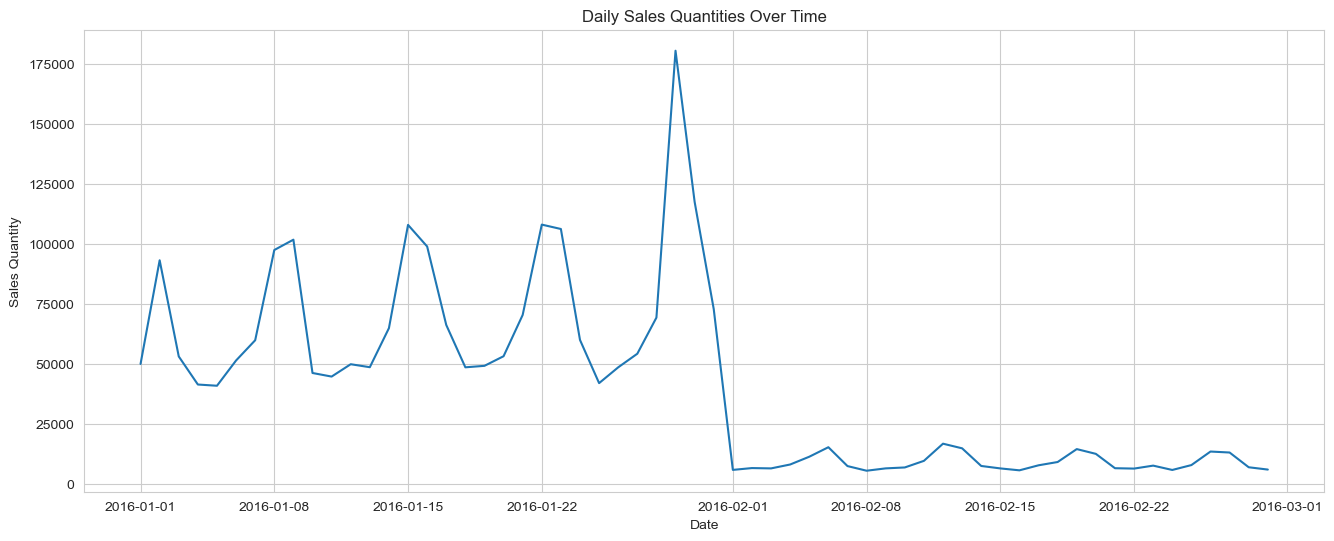

In [78]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the daily sales quantities over time
plt.plot(sales_by_date['SalesDate'], sales_by_date['SalesQuantity'])

# Set the title and labels
plt.title('Daily Sales Quantities Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')

# Show the plot
plt.show()

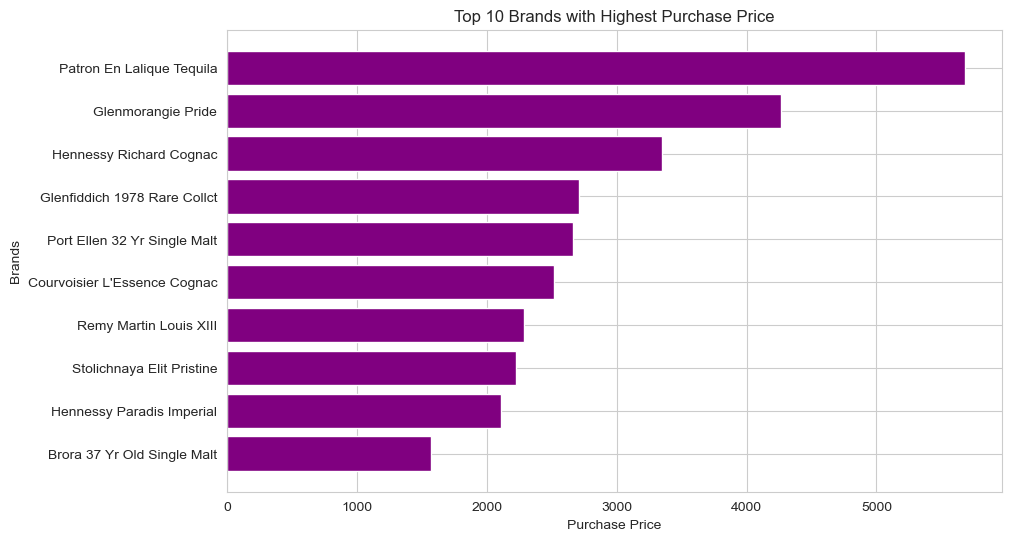

In [79]:
# Sort the data
vc = PurchaseFinal.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending=False)[:10]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(vc.index, vc.values, color='purple')

# Add title and labels
plt.title('Top 10 Brands with Highest Purchase Price')  
plt.xlabel('Purchase Price')  
plt.ylabel('Brands')  

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()